<a href="https://colab.research.google.com/github/JerryHung1103/ML/blob/PA1/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP 4331 2023 Fall Assignment 1

## Preparation

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn

In [ ]:
if __name__ == '__main__':
    from google.colab import drive
    drive.mount('/content/drive')
# todo start #
# please modify YourFilePath
    data_file = "/content/drive/MyDrive/xxx/heart_failure_clinical_records_dataset.csv"
# todo end #
    data_df = pd.read_csv(data_file)
    data_df.insert(0, 'patient_id', range(1, 1 + len(data_df)))
    data_df.head(10)

Mounted at /content/drive


In [ ]:
# data_df.head(5)

## Task 1. Basic summary

In [ ]:
def basic_summary(data_df):
  # List of attributes
  attributes = ['age', 'creatinine_phosphokinase']

  # Initialize an empty dictionary to store the results
  results = {}

  for attr in attributes:
    ### Calculate statistics
    # Write your code below
    mean = data_df[attr].mean();
    std_dev = data_df[attr].std();
    mode = data_df[attr].mode().iloc[0];
    median = data_df[attr].median();
    min_val = data_df[attr].min();
    q1 = data_df[attr].quantile(0.25)
    q3 = data_df[attr].quantile(0.75)
    max_val = data_df[attr].max()

    # Store the results in the dictionary
    results[attr] = {
      'Mean': mean,
      'Standard Deviation': std_dev,
      'Mode': mode,
      'Median': median,
      'Five-number summary': {
        'Min': min_val,
        'Q1': q1,
        'Median': median,
        'Q3': q3,
        'Max': max_val
      }
    }

  return results

In [ ]:
# Test the output of your function
if __name__=='__main__':
  results = basic_summary(data_df)
    # Print the results
  for attr, stats in results.items():
    print(f'Attribute: {attr}')
    for stat, value in stats.items():
      if stat == 'Five-number summary':
        print(stat + ':')
        for key, val in value.items():
          print(f'  {key}: {val}')
      else:
        print(f'{stat}: {value}')
    print('\n')

Attribute: age
Mean: 60.83389297658862
Standard Deviation: 11.89480907404447
Mode: 60.0
Median: 60.0
Five-number summary:
  Min: 40.0
  Q1: 51.0
  Median: 60.0
  Q3: 70.0
  Max: 95.0


Attribute: creatinine_phosphokinase
Mean: 581.8394648829432
Standard Deviation: 970.2878807124362
Mode: 582
Median: 250.0
Five-number summary:
  Min: 23
  Q1: 116.5
  Median: 250.0
  Q3: 582.0
  Max: 7861




## Task 2. Box plot

In [ ]:
def boxplot_df(data_df):
  # Initialize an empty dictionary to store the results
  results = {}

  ### (1) Boxplot of platelets
  # Write your code below
  fig, ax = plt.subplots()
  boxplot =ax.boxplot(data_df['platelets'])
  results['platelets'] = [item.get_ydata()[0] for item in boxplot['whiskers'] + boxplot['medians'] + boxplot['caps']]
  plt.title('Boxplot of Platelets')
  plt.show()
  plt.close()

  ### (2) Boxplot of platelets for various values of attribute "sex"
  # Write your code below
  fig, ax = plt.subplots()
  filter1=data_df['sex']==1
  filter0=data_df['sex']==0
  df0=data_df[filter0]
  df1=data_df[filter1]
  boxplot = ax.boxplot([df1['platelets'],df0['platelets']],labels = ['1', '0'])
  results['platelets_by_sex'] = [item.get_ydata()[0] for item in boxplot['whiskers'] + boxplot['medians'] + boxplot['caps']]
  plt.title('Boxplot of Platelets by Sex')
  plt.xlabel('Sex')
  plt.ylabel('Platelets')
  plt.show()
  plt.close()


  ### (3) Boxplot of platelets for various values of attribute "diabetes"
  # Write your code below
  fig, ax = plt.subplots()
  filter1=data_df['diabetes']==1
  filter0=data_df['diabetes']==0
  df0=data_df[filter0]
  df1=data_df[filter1]
  boxplot = ax.boxplot([df0['platelets'],df1['platelets']],labels = ['0', '1'])

  results['platelets_by_diabetes'] = [item.get_ydata()[0] for item in boxplot['whiskers'] + boxplot['medians'] + boxplot['caps']]
  plt.title('Boxplot of Platelets by Diabetes')
  plt.xlabel('Diabetes')
  plt.ylabel('Platelets')
  plt.show()
  plt.close()

  return results

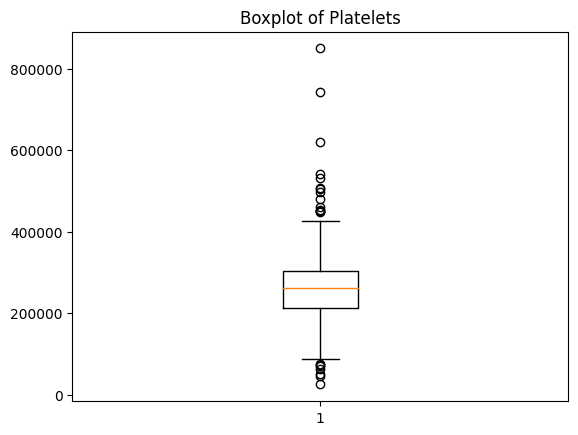

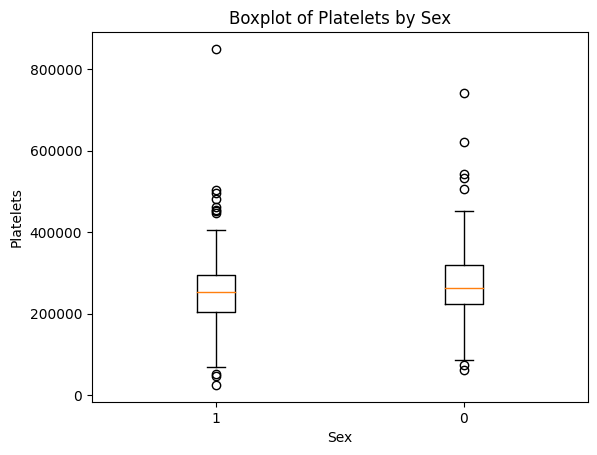

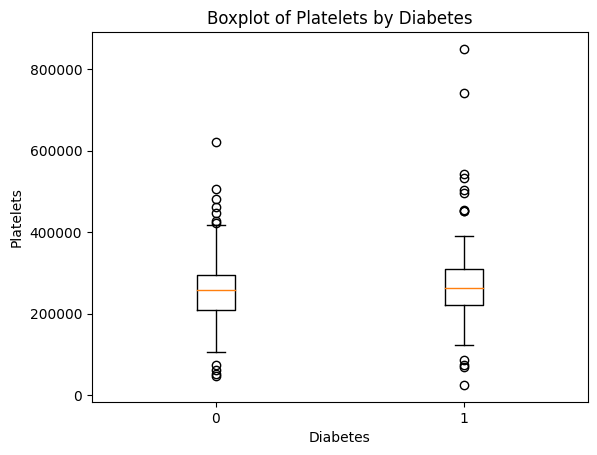

platelets:
  [212500.0, 303500.0, 262000.0, 87000.0, 427000.0]


platelets_by_sex:
  [203000.0, 293750.0, 223000.0, 319000.0, 253000.0, 263358.03, 70000.0, 406000.0, 87000.0, 451000.0]


platelets_by_diabetes:
  [210000.0, 294750.0, 221000.0, 310000.0, 257000.0, 263358.03, 105000.0, 418000.0, 122000.0, 390000.0]




In [ ]:
# Test the output of your function:
if __name__ == '__main__':
    results = boxplot_df(data_df)
    for key, value in results.items():
      print(f'{key}:')
      if isinstance(value, dict):
          for sub_key, sub_value in value.items():
              print(f'  {sub_key}: {sub_value}')
      else:
          print(f'  {value}')
      print('\n')

## Task 3. Hist plot

In [ ]:
def histplot_df(data_df):
  # Initialize an empty dictionary to store the results
  hist_results = {}

  ### Histogram of age
  # Write your code below
  fig = plt.figure() # create new figure
  ax = plt.subplot() # add an axes to current figure
  hist=ax.hist(data_df['age'], bins = 8,edgecolor = 'white', linewidth = 15)


  n, bins, patches = hist
  # Store the results
  hist_results['age'] = {
      'counts': n,
      'bin_edges': bins
  }
  plt.title('Histogram of Age')
  plt.xlabel('Age')
  plt.ylabel('Frequency')
  plt.show()
  plt.close()


  ### Histogram of ejection_fraction
  # Write your code below
  fig = plt.figure() # create new figure
  ax = plt.subplot() # add an axes to current figure
  hist=ax.hist(data_df['ejection_fraction'], bins = 8,edgecolor = 'white', linewidth = 15)


  n, bins, patches = hist
  # Store the results
  hist_results['ejection_fraction'] = {
      'counts': n,
      'bin_edges': bins
  }
  plt.title('Histogram of Ejection Fraction')
  plt.xlabel('Ejection Fraction')
  plt.ylabel('Frequency')
  plt.show()
  plt.close()

  return hist_results

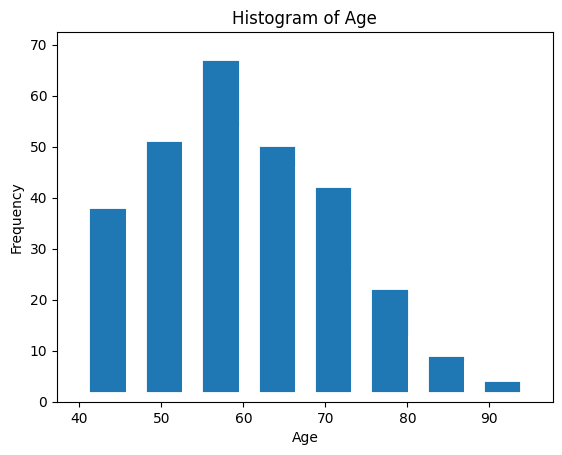

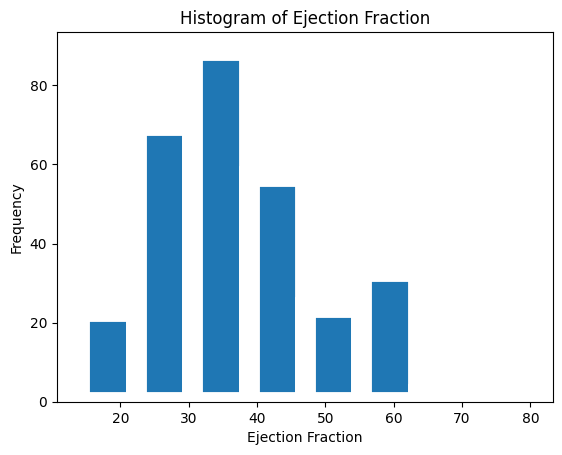


Attribute: age
Counts: [40. 53. 69. 52. 44. 24. 11.  6.]
Bin edges: [40.    46.875 53.75  60.625 67.5   74.375 81.25  88.125 95.   ]

Attribute: ejection_fraction
Counts: [23. 70. 89. 57. 24. 33.  2.  1.]
Bin edges: [14.   22.25 30.5  38.75 47.   55.25 63.5  71.75 80.  ]


In [ ]:
# Test the output of your function
if __name__ == '__main__':
  hist_results = histplot_df(data_df)
  # Print the results
  for attr, result in hist_results.items():
      print(f'\nAttribute: {attr}')
      print(f'Counts: {result["counts"]}')
      print(f'Bin edges: {result["bin_edges"]}')

# Task 4. Scatter plot

In [ ]:
def scatterplot_df(data_df):
  # Scatter plot of serum_creatinine and serum_sodium
  # Write your code below
  fig = plt.figure() # create new figure
  ax = plt.subplot() # add an axes to current figure

  scatter=ax.scatter(x = data_df['serum_creatinine'], y = data_df['serum_sodium'])
  # ax.set_xlim(0, 240)#x range


  plt.title('Scatter Plot of Serum Creatinine and Serum Sodium')
  plt.xlabel('Serum Creatinine')
  plt.ylabel('Serum Sodium')
  plt.show()

  # Calculate and print the correlation
  # Write your code to calculate correlation

  # meanOfserum_creatinine=data_df['serum_creatinine'].mean()
  # meanOfserum_sodium=data_df['serum_sodium'].mean()
  # sdOfserum_creatinine=data_df['serum_creatinine'].std()
  # sdOfserum_sodium=data_df['serum_sodium'].std()

  r=data_df[['serum_creatinine', 'serum_sodium']].corr(method='pearson')

  correlation = r.iloc[0,1]
  return correlation

In [ ]:
# g=data_df[['serum_creatinine', 'serum_sodium']].corr(method='pearson')
# print(g.iloc[0,1])

-0.18909521009117405


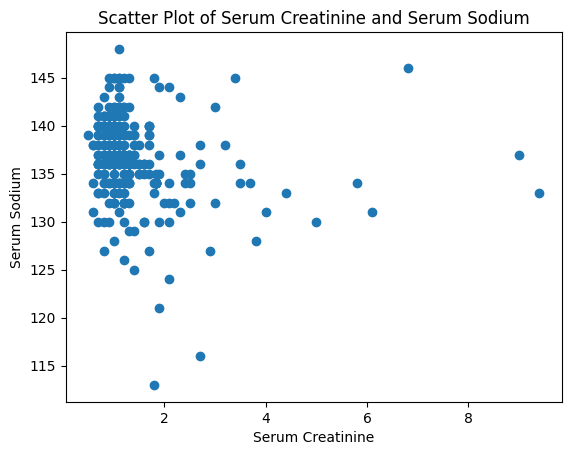

Correlation between Serum Creatinine and Serum Sodium: -0.18909521009117405


In [ ]:
if __name__=='__main__':
  correlation = scatterplot_df(data_df)
  print(f'Correlation between Serum Creatinine and Serum Sodium: {correlation}')

## Task 5. Correlation

In [ ]:
def corr_coefficient(data_df):
  # List of attributes
  attributes = ['age', 'sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'smoking']

  ### Write your code below
  # Calculate correlations and store them in a dictionary
  #correlations = data_df[attributes+['DEATH_EVENT']].corr(method='pearson')
  correlations_df = data_df[attributes+['DEATH_EVENT']].corr(method='pearson')
  correlations= correlations_df['DEATH_EVENT'].to_dict()

  # Get the top 3 most correlated attributes
  abs_correlations=correlations_df['DEATH_EVENT'].abs().sort_values(ascending=False)
  top_3=abs_correlations.drop(abs_correlations.index[0])
  top_3=top_3.iloc[0:3]


  return correlations, top_3

In [ ]:
if __name__=='__main__':
  correlations, top_3 = corr_coefficient(data_df)
  # Print the top 3 most correlated attributes along with their correlation values
  for attr in top_3.index:
      print(f'Attribute: {attr}, Correlation with DEATH_EVENT: {correlations[attr]}')

Attribute: serum_creatinine, Correlation with DEATH_EVENT: 0.29427756098414914
Attribute: ejection_fraction, Correlation with DEATH_EVENT: -0.26860331239406127
Attribute: age, Correlation with DEATH_EVENT: 0.25372854308800347


# Task 6. $\chi^2$-test



### $\chi^2$-test of diabetes and DEATH_EVENT

In [ ]:
def chi_square_diabetes(data_df):
  # Create a contingency table
  # Write your code below
  from scipy import stats
  contingency_table = pd.crosstab(data_df['diabetes'], data_df['DEATH_EVENT'])

  # Print the contingency table
  print('Contingency Table:')
  print(contingency_table)

  # Perform the Chi-Square test
  # Write your code below
  chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

  # Print the Chi-Square value and the p-value
  print(f'Chi-Square value: {chi2}')
  print(f'p-value: {p}')

  if p < 0.01:
      msg = 'The attributes diabetes and DEATH_EVENT are dependent on each other.'
  else:
      msg = 'The attributes diabetes and DEATH_EVENT are independent from each other.'

  return chi2, p, msg

In [ ]:
# Test the output of your function
if __name__ == '__main__':

  chi2, p, msg = chi_square_diabetes(data_df)

  # Print the Chi-Square value and the p-value
  print(f'Chi-Square value: {chi2}')
  print(f'p-value: {p}')
  # Check if the p-value is less than the significance level
  print(msg)

Contingency Table:
DEATH_EVENT    0   1
diabetes            
0            118  56
1             85  40
Chi-Square value: 0.0
p-value: 1.0
Chi-Square value: 0.0
p-value: 1.0
The attributes diabetes and DEATH_EVENT are independent from each other.


### $\chi^2$-test of smoking and DEATH_EVENT

In [ ]:
def chi2_square_smoking(data_df):
  # Create a contingency table
  # Write your code below
  from scipy import stats
  contingency_table = pd.crosstab(data_df['smoking'], data_df['DEATH_EVENT'])

  # Print the contingency table
  print('Contingency Table:')
  print(contingency_table)

  # Perform the Chi-Square test
  # Write your code below
  chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

  # Print the Chi-Square value and the p-value
  print(f'Chi-Square value: {chi2}')
  print(f'p-value: {p}')

  # Check if the p-value is less than the significance level
  if p < 0.01:
      msg = 'The attributes smoking and DEATH_EVENT are dependent on each other.'
  else:
      msg = 'The attributes smoking and DEATH_EVENT are independent from each other.'

  return chi2, p, msg

In [ ]:
# Test the output of your function
if __name__ == '__main__':
  chi2, p, msg = chi2_square_smoking(data_df)
  # Print the Chi-Square value and the p-value
  print(f'Chi-Square value: {chi2}')
  print(f'p-value: {p}')
  # Check if the p-value is less than the significance level
  print(msg)

Contingency Table:
DEATH_EVENT    0   1
smoking             
0            137  66
1             66  30
Chi-Square value: 0.007331473567119502
p-value: 0.9317652998235507
Chi-Square value: 0.007331473567119502
p-value: 0.9317652998235507
The attributes smoking and DEATH_EVENT are independent from each other.


## Task 7. Normalization

In [ ]:
# Normalize attribute time to range [0, 1]
def min_max_norm(data_df):
# Write your code below
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler(feature_range=(0,1))
  data_df['time'] = scaler.fit_transform(data_df[['time']])

  return data_df['time'].head(10)

In [ ]:
# Test the output of your function
if __name__ == '__main__':
  head = min_max_norm(data_df)
  print(head)

0    0.000000
1    0.007117
2    0.010676
3    0.010676
4    0.014235
5    0.014235
6    0.021352
7    0.021352
8    0.021352
9    0.021352
Name: time, dtype: float64


In [ ]:
# attributes = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium', 'serum_creatinine']
# data_df[attributes].head(10)

,creatinine_phosphokinase,ejection_fraction,platelets,serum_sodium,serum_creatinine
0,582,20,265000.00,130,1.9
1,7861,38,263358.03,136,1.1
2,146,20,162000.00,129,1.3
3,111,20,210000.00,137,1.9
4,160,20,327000.00,116,2.7
5,47,40,204000.00,132,2.1
6,246,15,127000.00,137,1.2
7,315,60,454000.00,131,1.1
8,157,65,263358.03,138,1.5
9,123,35,388000.00,133,9.4


In [ ]:
# Normalize attributes to mean 0 std 1
def z_score_norm(data_df):
  attributes = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium', 'serum_creatinine']
  # Write your code below

  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  for attr in attributes:
    data_df[attr] = scaler.fit_transform(data_df[[attr]])

  return data_df[attributes].head(10)

In [ ]:
# Test the output of your function
if __name__ == '__main__':
  head = z_score_norm(data_df)
  print(head)

   creatinine_phosphokinase  ejection_fraction     platelets  serum_sodium  \
0                  0.000166          -1.530560  1.681648e-02     -1.504036   
1                  7.514640          -0.007077  7.535660e-09     -0.141976   
2                 -0.449939          -1.530560 -1.038073e+00     -1.731046   
3                 -0.486071          -1.530560 -5.464741e-01      0.085034   
4                 -0.435486          -1.530560  6.517986e-01     -4.682176   
5                 -0.552141           0.162199 -6.079240e-01     -1.050016   
6                 -0.346704          -1.953749 -1.396531e+00      0.085034   
7                 -0.275472           1.854958  1.952488e+00     -1.277026   
8                 -0.438583           2.278147  7.535660e-09      0.312044   
9                 -0.473683          -0.260991  1.276539e+00     -0.823006   

   serum_creatinine  
0          0.490057  
1         -0.284552  
2         -0.090900  
3          0.490057  
4          1.264666  
5        

In [ ]:
# Output to a new csv file
if __name__ == '__main__':
# Write your code below
  file_name="data_normalized.csv"
  delimiter = ","
  data_df.to_csv(file_name, sep=delimiter, index=False, header=True)
  #Output your results from the above two steps to a new csv file named data normalized.csv (use
  #“,” as field delimiter and include column names in the header)

## Task 8. PCA

In [ ]:
if __name__ == '__main__':
  # Load the data
  data_df = pd.read_csv('data_normalized.csv')

In [ ]:
def cumulative_explained_variance(data_df):
  # Plot the cumulative explained variance

  # List of attributes to perform PCA on
  attributes = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium', 'serum_creatinine']

  # Write your code below
  from sklearn.decomposition import PCA
  pca = PCA()
  pca.fit(data_df[attributes])
  cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

  figure = plt.plot(range(1, len(attributes) + 1), cumulative_explained_variance)
  plt.xlabel('Number of Principal Components')
  plt.ylabel('Cumulative Explained Variance')
  plt.title('Cumulative Explained Variance vs Number of Principal Components')
  plt.show()

  # Store the cumulative explained variance in a dictionary
  result = {'cumulative_explained_variance': cumulative_explained_variance.tolist()}
  return result

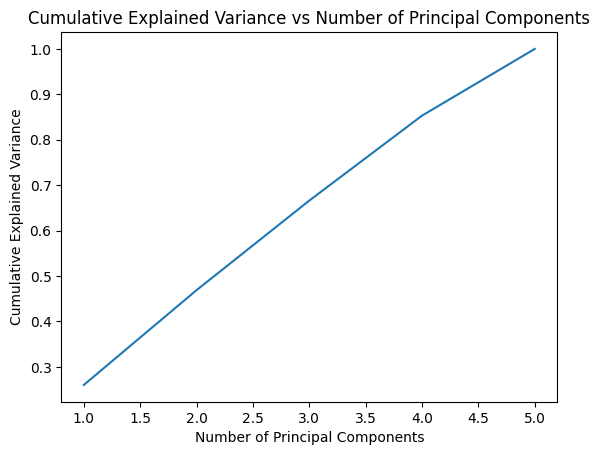


cumulative explained variance:
{'cumulative_explained_variance': [0.26035832501755896, 0.46896069595009515, 0.6661518535369085, 0.8531123654610124, 0.9999999999999999]}


In [ ]:
# Test the output of your code
if __name__ == '__main__':
  result = cumulative_explained_variance(data_df)
  # Print the output template
  print('\ncumulative explained variance:')
  print(result)

In [ ]:
def pca_df(data_df):
  # Transform the data by PCA
  # Write your code below
  from sklearn.decomposition import PCA
  attributes = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium', 'serum_creatinine']
  pca = PCA()
  pca.fit(data_df[attributes])
  cumsum = np.cumsum(pca.explained_variance_ratio_)
  num_components = np.argmax(cumsum >= 0.9) + 1
  #print(num_components)
  pca = PCA(n_components=num_components)
  data_reduced = pca.fit_transform(data_df[attributes])
  return data_reduced

In [ ]:
if __name__ == '__main__':
  data_reduced = pca_df(data_df)
  print(data_reduced)
  # print(type(data_reduced))

[[ 1.93352067  0.59289095  0.29889284 -0.81387714  0.05848952]
 [-0.90395577  5.67961417  3.16212506  3.17783172  1.84341588]
 [ 2.19506499  0.54514754 -0.90775517 -0.68931348  0.46126782]
 ...
 [-3.09596053 -0.18640418  4.13651695 -1.59144296  0.98221054]
 [-0.3107225   1.58678494 -0.21828181  1.75838763 -0.05184391]
 [-0.46950364 -0.83861213  1.00347229 -0.65849858  0.1215455 ]]


In [ ]:
def output_df(data_reduced):
  ### Output the reduced data to a new csv
  # Write your code below
  filename="data_reduced.csv"
  np.savetxt(filename, data_reduced, delimiter=',')

  # Read the data from the file
  data_from_file = np.loadtxt('data_reduced.csv', delimiter=',')
  # Check if the data matches
  if np.array_equal(data_reduced, data_from_file):
      msg = "The data matches."
  else:
      msg = "The data does not match."

  return msg

In [ ]:
if __name__ == '__main__':
  msg = output_df(data_reduced)
  print(msg)

The data matches.


In [ ]:
def five_number_summary(data_reduced):
  ### Print the five-number summary for each obtained dimension
  # Initialize an empty dictionary to store the results
  results = {}

  # Calculate and store the five-number summary for each obtained dimension
  # Write your code below
  for i in range(data_reduced.shape[1]):
      results[f'Dimension {i+1}'] = {
          'Min': np.min(data_reduced[:,i], axis=0),
          'Q1': np.percentile(data_reduced[:,i], 25, axis=0),
          'Median': np.median(data_reduced[:,i], axis=0),
          'Q3': np.percentile(data_reduced[:,i], 75, axis=0),
          'Max': np.max(data_reduced[:,i], axis=0)
      }

  return results

In [ ]:
if __name__ == '__main__':
  results = five_number_summary(data_reduced)
  # Print the output template
  print('\nFive Number Summary:')
  for dimension, summary in results.items():
      print(f'{dimension}:')
      for stat, value in summary.items():
          print(f'  {stat}: {value}')


Five Number Summary:
Dimension 1:
  Min: -3.095960534997593
  Q1: -0.7539647337014974
  Median: -0.15265114452802672
  Q3: 0.5801408370911711
  Max: 4.252172012886432
Dimension 2:
  Min: -4.012642124351812
  Q1: -0.5262976548554374
  Median: -0.07339062529774643
  Q3: 0.38261387380096845
  Max: 6.126576931564765
Dimension 3:
  Min: -2.037993609131624
  Q1: -0.6397500525475877
  Median: -0.12671549422461895
  Q3: 0.3652816581869684
  Max: 4.601363866954617
Dimension 4:
  Min: -3.612607047664211
  Q1: -0.6209706730694848
  Median: -0.06857259981702246
  Q3: 0.5087712449272193
  Max: 5.235180770160278
Dimension 5:
  Min: -3.391744232118596
  Q1: -0.521546728352163
  Median: -0.03192578968268151
  Q3: 0.5127156242313938
  Max: 3.556305436570305


## Task 9. Missing values

reloading the dataset

In [ ]:
if __name__ == '__main__':
  data_df = pd.read_csv(data_file)

In [ ]:
def missing_value(data_df):
  # Identify and fill in missing values
  # Write your code below

  # serum sodium value less than 130 mEq/L as missing values.
  # Similarly, consider the serum creatinine greater than 3 also missing values.
  # Please fill in the missing values with the corresponding attribute mod

  data_df.loc[data_df['serum_sodium'] < 130, 'serum_sodium'] = data_df['serum_sodium'].mode()[0]
  data_df.loc[data_df['serum_creatinine'] > 3, 'serum_creatinine'] = data_df['serum_creatinine'].mode()[0]


  # Scatter plot of serum_creatinine and serum_sodium
  # Write your code below
  fig = plt.figure() # create new figure
  ax = plt.subplot() # add an axes to current figure
  ax.scatter(x = data_df['serum_creatinine'], y = data_df['serum_sodium'])
  plt.xlabel('Serum Creatinine')
  plt.ylabel('Serum Sodium')
  plt.title('Scatter Plot of Serum Creatinine and Serum Sodium')
  plt.show()

  # Calculate and print the correlation
  # Write your code to calculate correlation

  r=data_df[['serum_creatinine', 'serum_sodium']].corr(method='pearson')
  correlation = r.iloc[0,1]
  return correlation

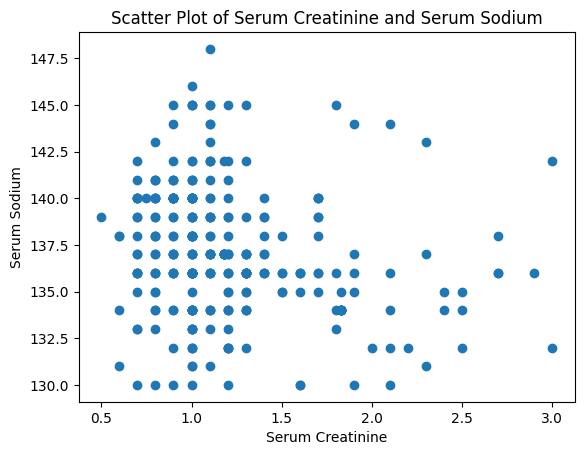

Correlation coefficient between serum_creatinine and serum_sodium: -0.1901725975568841


In [ ]:
if __name__=='__main__':
  correlation = missing_value(data_df)
  print(f'Correlation coefficient between serum_creatinine and serum_sodium: {correlation}')